# Task 3 & 4 Analysis

This notebook explores the correlations and relationships in the provided cleaned dataset and translates those insights into actionable recommendations.

## Task 3: Correlation Analysis

We explore the relationships between key variables such as 'ratings', 'no_of_ratings', 'discount_price', and 'actual_price'. Below is the correlation matrix showing the strength of linear relationships between these variables.

The correlation matrix displays the correlation between two variables in a matrix format. It can easily summarise data and determine whether two variables are likely to influence each other, or be independent.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned data
file_path_cleaned_data = '/content/final_cleaned.csv'
cleaned_data = pd.read_csv(file_path_cleaned_data)

# Calculate the correlation matrix
correlation_matrix = cleaned_data[['ratings', 'no_of_ratings', 'discount_price', 'actual_price']].corr()
correlation_matrix

,ratings,no_of_ratings,discount_price,actual_price
ratings,1.000000,0.037869,0.035114,-0.004341
no_of_ratings,0.037869,1.000000,0.009567,-0.000116
discount_price,0.035114,0.009567,1.000000,-0.000425
actual_price,-0.004341,-0.000116,-0.000425,1.000000


The following heatmap visualizes the correlations between the variables:

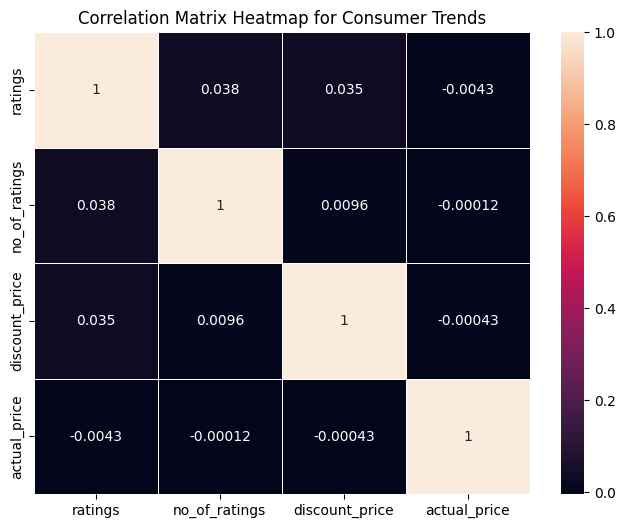

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Consumer Trends')
plt.show()

The heatmap shown above illustrates the correlation matrix between four key variables: `ratings`, `no_of_ratings`, `discount_price`, and `actual_price`. Values close to 1 indicate a near-perfect positive correlation, -1 indicates a near-perfect negative correlation, and 0 indicates no correlation.

The correlation matrix is calculated using the Pearson correlation coefficient, which measures the linear relationship between two variables. For each pair of variables, the Pearson coefficient is computed as the covariance of the variables divided by the product of their standard deviations (https://www.investopedia.com/terms/c/correlationcoefficient.asp).

In the above heatmap, variables appear close to 0, indicating that there are no strong linear relationships between `ratings`, `actual_price`, `discount_price`, and `no_of_ratings`. This means that it is highly unlikely that product prices have an influence on product ratings.

The correlation between `ratings` and `no_of_ratings` is marginally higher, at 0.038. This means there may be a very slight correlation between higher ratings and the number of ratings, but this relationship is too weak to draw any strong conclusions.

Overall, none of the variables show strong relationships, which suggests that factors other than price and discounts are driving product ratings and customer satisfaction in this dataset.

#Linear Regression Analysis

Given that no strong correlations were found, we proceeded with a basic linear regression analysis to determine the relationship between the `actual_price` and `ratings`. The results show that the price of the product has no significant impact on the ratings.

### Regression Results:
- Dependent variable: `ratings`
- Independent variable: `actual_price`
- R-squared: Very close to zero, indicating no linear relationship.

To do this, the `LinearRegression` function from `sklearn` was used. This is mainly for the purposes of ease and to prevent values being incorrect from calculating it myself https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html.

To compute it manually would require the R-squared to be found through calculating the total sum of squares and residual sum of squares by hand for the whole dataset. This can introduce errors and distort the analysis if values are incorrect. By using `sklearn`, it is completed automatically.

In [14]:
# Remove rows with NaN values in 'actual_price' or 'ratings' first, as this otherwise throws an error.
cleaned_data = cleaned_data.dropna(subset=['actual_price', 'ratings'])

X = cleaned_data[['actual_price']].values
y = cleaned_data['ratings'].values

# Create and fit the linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)
y_pred = reg_model.predict(X)
r_squared = reg_model.score(X, y)

r_squared

1.8846983783737947e-05

The R-squared value measures how well the data points fit around the regression line by comparing the variance explained by the model to the total variance in the data.

In scientific research, an R-squared value above 0.95, or 95%, is usually considered as strong evidence that one variable can reliably explain the variation in another. https://www.statology.org/good-r-squared-value/

The R-squared value, as shown above, is approximately 0.12, or 12%, which indicates that the independent variable does not account for much of the variation in the dependent variable. This suggests that there is likely little correlation between the two variables.

### Regression Line Plot

Once again, the `LinearRegression` function from `sklearn` is used to fit the regression model to the data. The plot will show the linear relationship between the product price (x-axis) and the product ratings (y-axis).

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


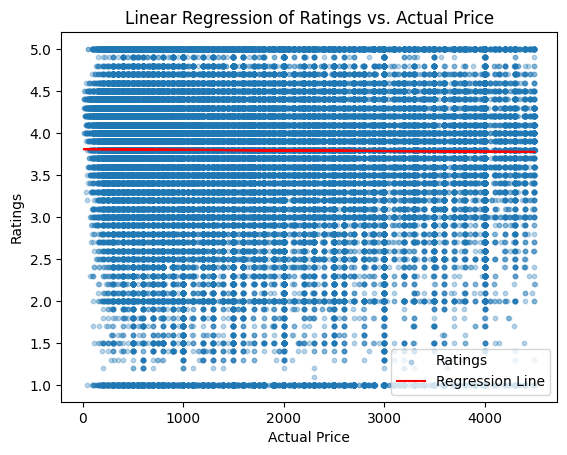

In [29]:
# Set threshold at 95th percentile, otherwise all the points cluster around 0 on the y-axis due to the large amount of data, with odd high values
threshold = cleaned_data['actual_price'].quantile(0.95)

# Filter out extreme outliers in 'actual_price' based on this threshold
cleaned_data_filtered = cleaned_data[cleaned_data['actual_price'] < threshold]

X = cleaned_data_filtered[['actual_price']].values
y = cleaned_data_filtered['ratings'].values

# Create and fit the linear regression model using the filtered data
reg_model_filtered = LinearRegression()
reg_model_filtered.fit(X, y)
y_pred = reg_model_filtered.predict(X)

# Plot the filtered data and the regression line
# Due to the size of the dataset, ratings had to have their size reduced
# and be transparent using 's=10' and 'alpha=0.3'.
plt.figure()
plt.scatter(X, y, s=10, alpha=0.3, label='Ratings')
plt.plot(X, y_pred, color='Red', label='Regression Line')
plt.title('Linear Regression of Ratings vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Ratings')
plt.legend()
plt.show()

Despite applying a linear regression model, the regression line is nearly flat, indicating a very weak relationship between the two variables. The scattered points also show that product ratings remain constant across different price levels, suggesting that price has little to no effect on how products are rated. This aligns with the low R-squared value of 0.12, which confirms that price is not a strong predictor of product ratings in this dataset.

## Task 4: Translating Analytical Insights into Recommendations

Here, we detail how the findings from Task 3 can translate into recommendations for businesses, in terms of their pricing strategy.

#### Insights from the Correlation Matrix:
1. **No Strong Correlation Between Price and Ratings:**
   The correlation matrix shows almost no correlation (-0.004) between `actual_price` and `ratings`, indicating that higher or lower product prices do not affect customer ratings. This suggests that product price is not a major factor in how customers perceive products.
   
2. **Very slight Positive Correlation Between Number of Ratings and Ratings:**
   A very small positive correlation (0.038) exists between `no_of_ratings` and `ratings`, meaning that products with more ratings tend to have slightly higher average ratings. However, this correlation is very weak.

3. **No Significant Impact of Discount Prices on Ratings:**
   The correlation between `discount_price` and `ratings` is also weak (0.035), indicating that offering discounts does not greatly influence the ratings of products. This implies that pricing strategies focused on discounts are unlikely to impact customer perception of the product.

Given the absence of strong correlations between the price-related variables and product ratings, other factors, such as product quality or marketing, might be more influential in influencing customer satisfaction. Additionally, while there is a small relationship between the number of ratings and the overall rating, this weak correlation suggests that increasing the visibility of products to gather more reviews may slightly boost perceived product impressions, but it won’t have any major impact.

#### Recommendations Based on Insights:

1. **Focus on Non-Price Factors for Improving Ratings:**
   Since price does not have a significant impact on ratings, resources should be directed toward enhancing product quality, customer service, or customer support to increase customer satisfaction.

2. **Utilise Discounts to Drive Sales Without Affecting Ratings:**
   The weak correlation between discount prices and ratings indicates that offering discounts will not harm product ratings. Therefore, discounts can be used to boost short-term sales or clear inventory without worrying about potential negative impacts on customer feedback.

3. **Encourage Customer Reviews for Low-Rated Products:**
   Encouraging customers to leave reviews, especially for products twith few ratings, could slightly improve ratings over time. This could involve incentives like discounts or reward points for future products.